<a href="https://colab.research.google.com/github/MehrnazSadeghieh/Computational-Intelligence-SecondProject/blob/main/Computational_Intelligence_project_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Inteligence Second Project


*In* this project we're once again facing a challange to see how we can continiue working on our features and choose the best possible set of features! so we're gonna first see how well each feature acts on its own and we're gonna use a Deciesion Tree Classifier for this and then see how different is each feature from the rest of features on general which we're gonna use Correlation.

First let's start with Deciesion Tree, we just need to test all the features we got in our last phase and check how much accuracy it can gives us alone.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statistics import mean
import numpy as np
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
import pickle
from scipy.signal import butter, lfilter
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import scipy.stats as sp
import random
import os
from sklearn import tree
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb

Let's have a function for our deciesion tree:

In [ ]:
def decisionTree(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=seed,test_size=0.2)
    clf = tree.DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test,y_pred)

Like last phase we're trying to recieve our data from pickles and have our x and y lists ready:

In [ ]:
seed = 57
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)


x = pickle.load(open('/content/drive/MyDrive/CI/x.pkl', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/CI/y.pkl', 'rb'))

x_normal = np.concatenate((x[:300], x[400:]), axis=0)
x_seizure = x[300:400]
sampling_freq = 173.6 #based on info from website

b, a = butter(3, [0.5,40], btype='bandpass',fs=sampling_freq)


x_normal_filtered = np.array([lfilter(b,a,x_normal[ind,:]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[ind,:]) for ind in range(x_seizure.shape[0])])

x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

x = np.concatenate((x_normal,x_seizure))
y = np.concatenate((np.zeros((400,1)), np.full((100,1), 1)))


Later on, we'll see for making our classification algorithms faster we need to normalize our features which we'll do it by the normalize function down below.

In [ ]:
def normalize (x):
    norm = np.linalg.norm(x)
    x = x / norm
    return x

Now like our last phase we stablish our features which as we remember are mostly three groups of feature engineering Statistical, Time domain, and Frequency domain.

In [ ]:
abs_max_values = np.zeros((500,1))
mean_values = np.zeros((500, 1))
median_values = np.zeros((500,1))
variance_values = np.zeros((500,1))
standard_deviation_values = np.zeros((500,1))
ptp_values = np.zeros((500,1))
skew_values = np.zeros((500,1))
kurtosis_values = np.zeros((500, 1))
RMS_values = np.zeros((500,1))

i = 0
for row in x:
    abs_max_values[i][0] = max(row)
    mean_values[i][0] = np.mean(row)
    median_values[i][0] = np.median(row)
    variance_values[i][0] = np.var(row)
    standard_deviation_values[i][0] = np.std(row)
    ptp_values[i][0] = np.ptp(row)
    skew_values[i][0] = sp.skew(row)
    kurtosis_values[i][0] = sp.kurtosis(row)
    RMS_values[i][0] = np.sqrt(np.mean(row ** 2))
    i += 1

abs_max_values = normalize(abs_max_values)
mean_values = normalize(mean_values)
median_values = normalize(median_values)
variance_values = normalize(variance_values)
standard_deviation_values = normalize(standard_deviation_values)
ptp_values = normalize(ptp_values)
skew_values = normalize(skew_values)
kurtosis_values = normalize(kurtosis_values)
RMS_values = normalize(RMS_values)

crest_factor_margin_values = np.zeros((500, 1))
margin_factor_values = np.zeros((500,1))
A_factor_values = np.zeros((500,1))
B_factor_values = np.zeros((500,1))

for i in range (0, 500):
    crest_factor_margin_values[i][0] = abs_max_values[i][0] / RMS_values[i][0]
    margin_factor_values[i][0] = abs_max_values[i][0] / variance_values[i][0]
    A_factor_values[i][0] = abs_max_values[i][0] / (standard_deviation_values[i][0] * variance_values[i][0])
    B_factor_values[i][0] = (kurtosis_values[i][0] * crest_factor_margin_values[i][0]) / standard_deviation_values[i][0]

crest_factor_margin_values = normalize(crest_factor_margin_values)
margin_factor_values = normalize(margin_factor_values)
A_factor_values = normalize(A_factor_values)
B_factor_values = normalize(B_factor_values)

At this point we need to check each feature in a Deciesion Tree and get the accuracy:

In [ ]:
attribute_list = []
A_factor_accuracy = decisionTree(A_factor_values, y)
attribute_list.append([A_factor_accuracy, "a_factor"])

B_factor_accuracy = decisionTree(B_factor_values, y)
attribute_list.append([B_factor_accuracy, "b_factor"])

mean_values_accuracy = decisionTree(mean_values, y)
attribute_list.append([mean_values_accuracy, "mean"])

abs_max_values_accuracy = decisionTree(abs_max_values, y)
attribute_list.append([abs_max_values_accuracy, "absolute_max"])

median_values_accuracy = decisionTree(median_values, y)
attribute_list.append([median_values_accuracy, "median"])

variance_values_accuracy = decisionTree(variance_values, y)
attribute_list.append([variance_values_accuracy, "variance"])

skew_values_accuracy = decisionTree(skew_values, y)
attribute_list.append([skew_values_accuracy, "skew"])

kurtosis_values_accuracy = decisionTree(kurtosis_values, y)
attribute_list.append([kurtosis_values_accuracy, "kurtosis"])

RMS_values_accuracy = decisionTree(RMS_values, y)
attribute_list.append([RMS_values_accuracy, "rms"])

crest_factor_accuracy = decisionTree(crest_factor_margin_values, y)
attribute_list.append([crest_factor_accuracy, "crest_factor"])

margin_factor_accuracy = decisionTree(margin_factor_values, y)
attribute_list.append([margin_factor_accuracy, "margin_factor"])

standard_deviation_accuracy = decisionTree(standard_deviation_values, y)
attribute_list.append([standard_deviation_accuracy, "standard_deviation"])

ptp_accuracy = decisionTree(ptp_values, y)
attribute_list.append([ptp_accuracy, "point_to_point"])

print(attribute_list)

[[0.98, 'a_factor'], [0.69, 'b_factor'], [0.71, 'mean'], [0.94, 'absolute_max'], [0.97, 'median'], [0.96, 'variance'], [0.86, 'skew'], [0.77, 'kurtosis'], [0.96, 'rms'], [0.71, 'crest_factor'], [0.99, 'margin_factor'], [0.96, 'standard_deviation'], [0.95, 'point_to_point']]


Now let's get Correlation for all our features and see how each of them correlate with each other:

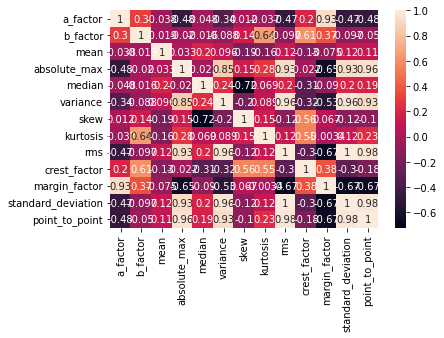

In [ ]:
mean_values_new = np.reshape(mean_values , -1)
abs_max_values_new = np.reshape(abs_max_values , -1)
median_values_new = np.reshape(median_values , -1)
variance_values_new = np.reshape(variance_values , -1)
standard_deviation_new = np.reshape(standard_deviation_values , -1)
ptp_new = np.reshape(ptp_values , -1)
skew_values_new = np.reshape(skew_values , -1)
kurtosis_values_new = np.reshape(kurtosis_values , -1)
RMS_values_new = np.reshape(RMS_values , -1)
A_factor_values_new = np.reshape(A_factor_values , -1)
B_factor_values_new = np.reshape(B_factor_values , -1)
crest_factor_margin_new = np.reshape(crest_factor_margin_values , -1)
margin_factor_new = np.reshape(margin_factor_values , -1)

data = {
    'a_factor' : A_factor_values_new,
    'b_factor' : B_factor_values_new,
    'mean' : mean_values_new,
    'absolute_max' : abs_max_values_new,
    'median' : median_values_new,
    'variance' : variance_values_new,
    'skew' : skew_values_new,
    'kurtosis' : kurtosis_values_new,
    'rms' : RMS_values_new,
    'crest_factor' : crest_factor_margin_new,
    'margin_factor' : margin_factor_new,
    'standard_deviation' : standard_deviation_new,
    'point_to_point' : ptp_new
}


df = pd.DataFrame(data)
corr = df.corr()
sb.heatmap(corr, annot=True)
plt.show()

We're asked to find a way to use these to informations and find a set of features that are best for our task, we can either try to find features till we reach our desired accuracy or we can choose a number of our features but to do so we need to find the best group of features. We try to find 5 of the best features by using F1 score and see how we can get features with the best score based on their correlation with others and accuracy.

In [ ]:
best_accuracy = 0
feature_index = []
best_features = []
best_index = 0

for i in range (0, 13):
    if best_accuracy < attribute_list[i][0]:
        best_accuracy = attribute_list[i][0]
        best_index = i

feature_index.append(best_index)
best_features.append(attribute_list[feature_index[0]])

f1_score = []
for j in range(0, 13):
    array = []
    for k in range(0, 13):
        array.append(2 * (attribute_list[j][0] * (1 / abs(corr[attribute_list[j][1]][k]))) / (attribute_list[j][0] + (1 / abs(corr[attribute_list[j][1]][k]))))
    f1_score.append(array)

for i in range (0, 4):
    max = 0
    max_index = 0

    for j in range(0, 13):
        if not j in feature_index:
            sum_index = 0
            for f_index in feature_index:
                sum_index += f1_score[f_index][j]

            if max < sum_index:
                max = sum_index
                max_index = j

    best_features.append(attribute_list[max_index])
    feature_index.append(max_index)


print(best_features)

[[0.99, 'margin_factor'], [0.77, 'kurtosis'], [0.97, 'median'], [0.71, 'mean'], [0.69, 'b_factor']]


Now that we got our selected features we're asked to use a clustering method on our dataset to see what happens if instead of our data we had clusters of data and trained our classifier on each of them individualy also when we want to predict our test data we see what cluster it belongs to and use that classifier.

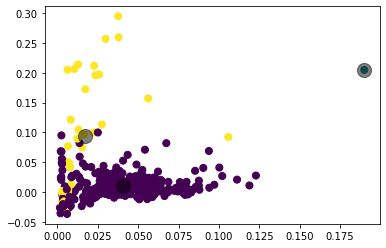

KNN using 60 neighbors and weights uniform:  
KNN accuracy:  0.93
KNN precision:  1.0
KNN recall:  0.7307692307692307


In [ ]:
x = np.concatenate((margin_factor_values, kurtosis_values, median_values, B_factor_values, abs_max_values), 1)


x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=seed,test_size=0.2 )

kmeans = KMeans(n_clusters=3, n_init=4)
kmeans.fit(x_train)
y_kmeans = kmeans.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


cluster1 = []
y_train1 = []
cluster2 = []
y_train2 = []
cluster3 = []
y_train3 = []

for i in range (0,400):
    if y_kmeans[i] == 0:
        cluster1.append(x_train[i])
        y_train1.append(y_train[i])
    if y_kmeans[i] == 1:
        cluster2.append(x_train[i])
        y_train2.append(y_train[i])
    if y_kmeans[i] == 2:
        cluster3.append(x_train[i])
        y_train3.append(y_train[i])

knn1 = neighbors.KNeighborsClassifier(n_neighbors=10 , weights='uniform')
knn2 = neighbors.KNeighborsClassifier(n_neighbors=10 , weights='uniform')
knn3 = neighbors.KNeighborsClassifier(n_neighbors=10 , weights='uniform')

knn1.fit(cluster1, np.ravel(y_train1))
knn2.fit(cluster2, np.ravel(y_train2))
knn3.fit(cluster3, np.ravel(y_train3))

y_pred = []
for x in x_test:
    x = x.reshape(1, -1)
    centroid = kmeans.predict(x)
    if centroid == 0:
        y_pred.append(knn1.predict(x))
    elif centroid == 1:
        y_pred.append(knn2.predict(x))
    elif centroid == 2:
        y_pred.append(knn3.predict(x))

print("KNN using 60 neighbors and weights uniform:  ")
print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN precision: ", precision_score(y_test, y_pred))
print("KNN recall: ", recall_score(y_test, y_pred))

# Conclusion

As we saw above having our data clustered helped our classifier and made it more accurate like what we had in our last phase KNN had the accuracy of 0.9 and it's 0.93 now! Another way to deal with this dataset is to have 3 classes instead of 2 but this way makes accuracy worse and it makes it dificult for our classifer to find our goal but if we choose 1 of them against our seizure data set it might make our accuracy better or worse.